In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crops=pd.read_csv("crop_production.csv")
rain=pd.read_csv("rainfall_in_india_till_2023.csv")
economy=pd.read_csv("indianEco_till_2023.csv")

In [3]:
crops.head()

,State_Name,District_Name,YEAR,Season,Crop,Area,Production,MSP
0,Andhra Pradesh,ANANTAPUR,2019,Kharif,Arhar/Tur,66013.0,11156.0,168.997016
1,Andhra Pradesh,ANANTAPUR,2019,Kharif,Bajra,2019.0,1465.0,725.606736
2,Andhra Pradesh,ANANTAPUR,2019,Kharif,Castor seed,4328.0,3795.0,876.848429
3,Andhra Pradesh,ANANTAPUR,2019,Kharif,Cotton(lint),4338.0,2977.0,686.260950
4,Andhra Pradesh,ANANTAPUR,2019,Kharif,Dry chillies,1968.0,7307.0,3712.906504


In [4]:
rain.head()

,State_Name,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,2023,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,2016,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,2018,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,2022,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,2021,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [5]:
economy.head()

,YEAR,Country Name,GDP (current US$),GDP per capita (current US$),GDP growth (annual %),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Total reserves (includes gold, current US$)","Inflation, consumer prices (annual %)","Population, total",Population growth (annual %),"Life expectancy at birth, total (years)"
0,2010,India,37029883876,82,0.00,6.83,4.46,674536630.9,1.78,445954579,2.31,41.13
1,2011,India,39232435784,85,3.72,5.96,4.30,666357094.9,1.70,456351876,2.33,41.74
2,2012,India,42161481858,90,2.93,6.03,4.17,512791844.0,3.63,467024193,2.34,42.34
3,2013,India,48421923459,101,5.99,5.91,4.28,607862500.4,2.95,477933619,2.34,42.94
4,2014,India,56480289941,116,7.45,5.69,3.73,499145125.8,13.36,489059309,2.33,43.57


In [6]:
crops.isnull().sum()

State_Name         0
District_Name      0
YEAR               0
Season             0
Crop               0
Area               0
Production       567
MSP                0
dtype: int64

In [7]:
crops.dropna(inplace=True,axis=0)
crops.isnull().sum()

State_Name       0
District_Name    0
YEAR             0
Season           0
Crop             0
Area             0
Production       0
MSP              0
dtype: int64

In [8]:
rain.isnull().sum()

State_Name     0
YEAR           0
JAN            4
FEB            3
MAR            6
APR            4
MAY            3
JUN            5
JUL            7
AUG            4
SEP            6
OCT            7
NOV           11
DEC           10
ANNUAL        26
Jan-Feb        6
Mar-May        9
Jun-Sep       10
Oct-Dec       13
dtype: int64

In [9]:
rain.dropna(inplace=True,axis=0)
rain.isnull().sum()

State_Name    0
YEAR          0
JAN           0
FEB           0
MAR           0
APR           0
MAY           0
JUN           0
JUL           0
AUG           0
SEP           0
OCT           0
NOV           0
DEC           0
ANNUAL        0
Jan-Feb       0
Mar-May       0
Jun-Sep       0
Oct-Dec       0
dtype: int64

In [10]:
economy.isnull().sum()

YEAR                                             0
Country Name                                     0
GDP (current US$)                                0
 GDP per capita (current US$)                    0
GDP growth (annual %)                            0
Imports of goods and services (% of GDP)         0
Exports of goods and services (% of GDP)         0
 Total reserves (includes gold, current US$)     0
Inflation, consumer prices (annual %)            0
Population, total                                0
Population growth (annual %)                     0
Life expectancy at birth, total (years)          0
dtype: int64

In [11]:
left=crops[["State_Name","YEAR","Season","Crop","Area","MSP"]]
right=rain[["State_Name","YEAR","ANNUAL"]]
eco_final=economy[["YEAR","Population, total"]]

In [39]:
fin=pd.merge(left,right,on=["YEAR","State_Name"])
final=pd.merge(fin,eco_final,on=["YEAR"])
final.head()

,State_Name,YEAR,Season,Crop,Area,MSP,ANNUAL,"Population, total"
0,Andhra Pradesh,2019,Kharif,Arhar/Tur,66013.0,168.997016,1021.5,545314670
1,Andhra Pradesh,2019,Kharif,Arhar/Tur,66013.0,168.997016,1289.6,545314670
2,Andhra Pradesh,2019,Kharif,Arhar/Tur,66013.0,168.997016,1087.3,545314670
3,Andhra Pradesh,2019,Kharif,Arhar/Tur,66013.0,168.997016,1155.9,545314670
4,Andhra Pradesh,2019,Kharif,Arhar/Tur,66013.0,168.997016,1153.5,545314670


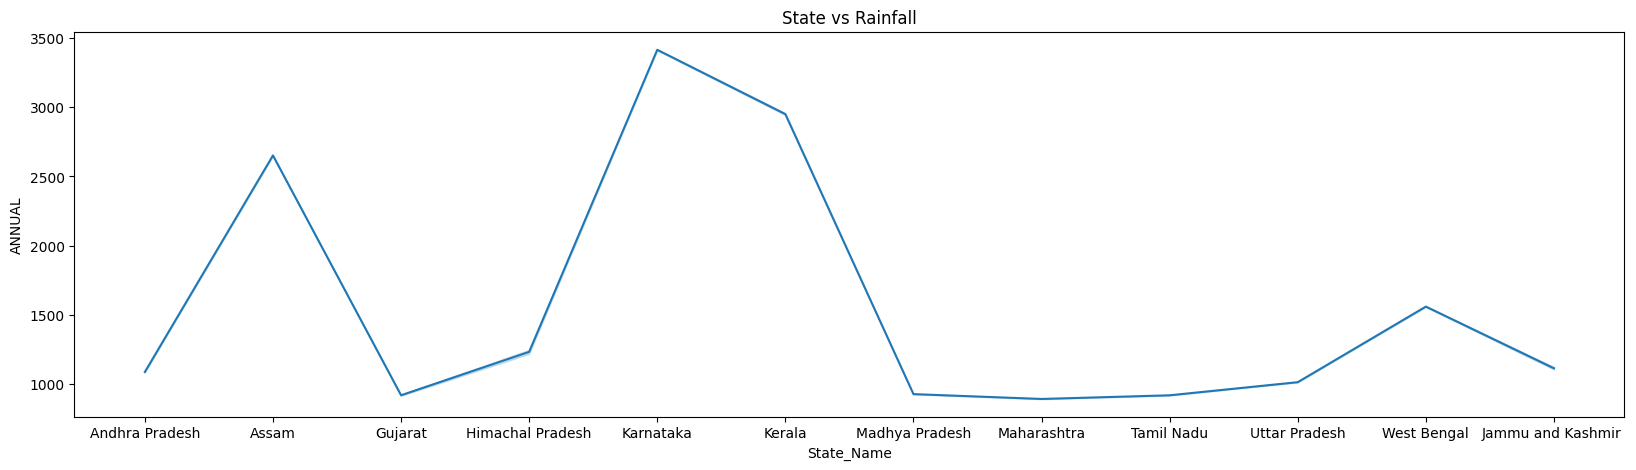

In [92]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=final, x="State_Name", y="ANNUAL")
plt.title("State vs Rainfall")
plt.show()

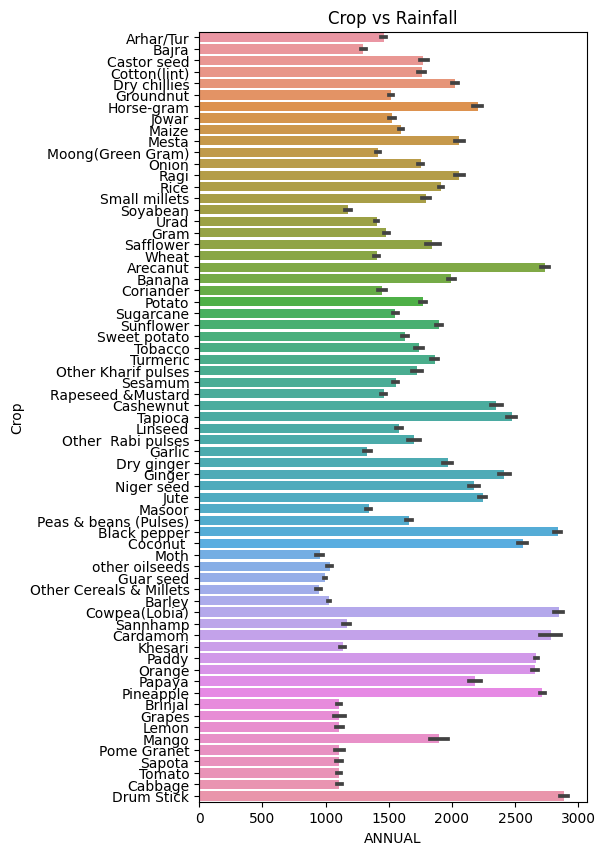

In [85]:
plt.figure(figsize=(5, 10))
sns.barplot(data=final, y="Crop", x="ANNUAL")
plt.title("Crop vs Rainfall")
plt.show()

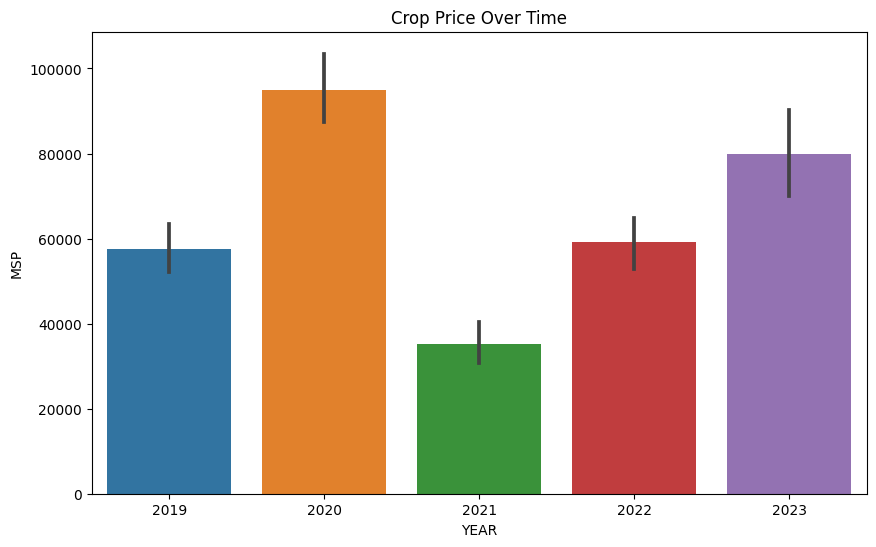

In [86]:
plt.figure(figsize=(10, 6))
sns.barplot(data=final, x="YEAR", y="MSP")
plt.title("Crop Price Over Time")
plt.show()

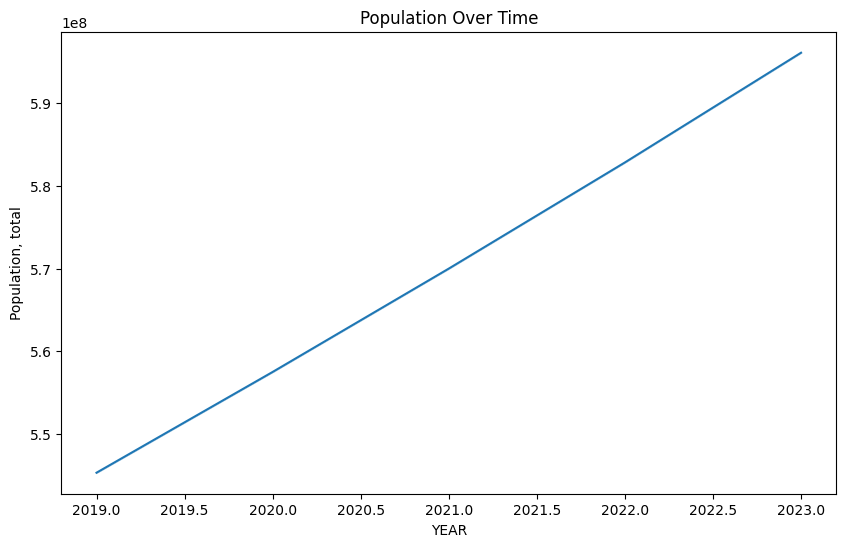

In [69]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=final, x="YEAR", y="Population, total")
plt.title("Population Over Time")
plt.show()

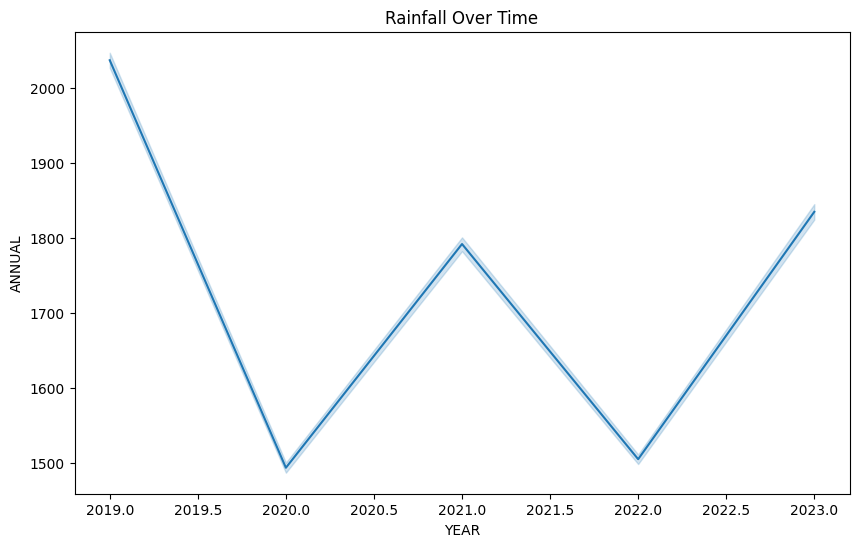

In [88]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=final, x="YEAR", y="ANNUAL")
plt.title("Rainfall Over Time")
plt.show()

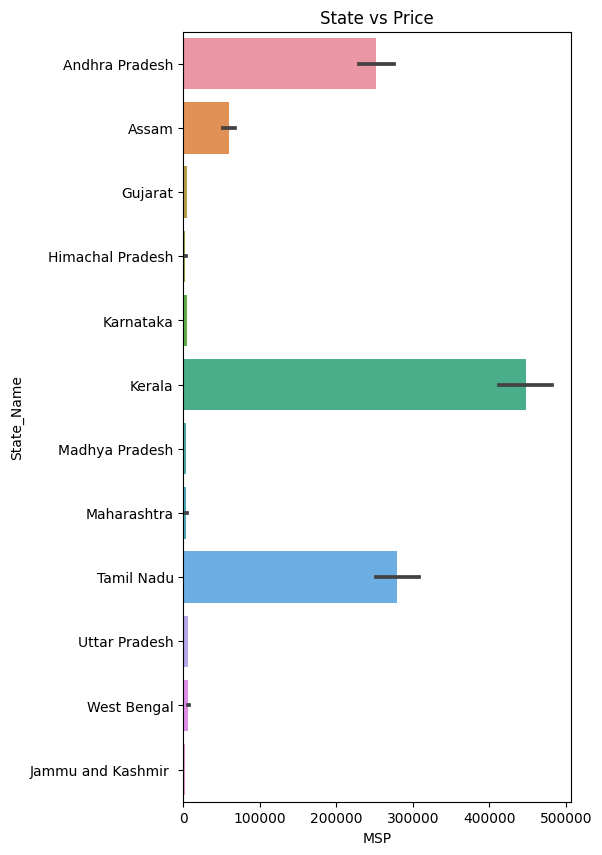

In [82]:
plt.figure(figsize=(5, 10))
sns.barplot(data=final, y="State_Name", x="MSP")
plt.title("State vs Price")
plt.show()

In [13]:
s=0
l1=final["State_Name"].unique()
for i in l1:
  s+=1
  print(i,s)

Andhra Pradesh 1
Assam 2
Gujarat 3
Himachal Pradesh 4
Karnataka 5
Kerala 6
Madhya Pradesh 7
Maharashtra 8
Tamil Nadu 9
Uttar Pradesh 10
West Bengal 11
Jammu and Kashmir  12


In [14]:
s=0
l2=final["Season"].unique()
for i in  l2:
  s+=1
  print(i,s)

Kharif      1
Rabi        2
Whole Year  3
Autumn      4
Summer      5
Winter      6


In [15]:
s=0
l3=final["Crop"].unique()
for i in l3:
  s+=1
  print(i,s)

Arhar/Tur 1
Bajra 2
Castor seed 3
Cotton(lint) 4
Dry chillies 5
Groundnut 6
Horse-gram 7
Jowar 8
Maize 9
Mesta 10
Moong(Green Gram) 11
Onion 12
Ragi 13
Rice 14
Small millets 15
Soyabean 16
Urad 17
Gram 18
Safflower 19
Wheat 20
Arecanut 21
Banana 22
Coriander 23
Potato 24
Sugarcane 25
Sunflower 26
Sweet potato 27
Tobacco 28
Turmeric 29
Other Kharif pulses 30
Sesamum 31
Rapeseed &Mustard 32
Cashewnut 33
Tapioca 34
Linseed 35
Other  Rabi pulses 36
Garlic 37
Dry ginger 38
Ginger 39
Niger seed 40
Jute 41
Masoor 42
Peas & beans (Pulses) 43
Black pepper 44
Coconut  45
Moth 46
other oilseeds 47
Guar seed 48
Other Cereals & Millets 49
Barley 50
Cowpea(Lobia) 51
Sannhamp 52
Cardamom 53
Khesari 54
Paddy 55
Orange 56
Papaya 57
Pineapple 58
Brinjal 59
Grapes 60
Lemon 61
Mango 62
Pome Granet 63
Sapota 64
Tomato 65
Cabbage 66
Drum Stick 67


In [16]:
df=final

In [17]:
df.head()

,State_Name,YEAR,Season,Crop,Area,MSP,ANNUAL,"Population, total"
0,Andhra Pradesh,2019,Kharif,Arhar/Tur,66013.0,168.997016,1021.5,545314670
1,Andhra Pradesh,2019,Kharif,Arhar/Tur,66013.0,168.997016,1289.6,545314670
2,Andhra Pradesh,2019,Kharif,Arhar/Tur,66013.0,168.997016,1087.3,545314670
3,Andhra Pradesh,2019,Kharif,Arhar/Tur,66013.0,168.997016,1155.9,545314670
4,Andhra Pradesh,2019,Kharif,Arhar/Tur,66013.0,168.997016,1153.5,545314670


In [18]:
df["State_Name"].replace({'Andhra Pradesh':1, 'Assam':2, 'Gujarat':3, 'Himachal Pradesh':4,
       'Karnataka':5, 'Kerala':6, 'Madhya Pradesh':7, 'Maharashtra':8,
       'Tamil Nadu':9, 'Uttar Pradesh':10, 'West Bengal':11, 'Jammu and Kashmir ':12},inplace=True)

In [19]:
df["Season"].replace({'Kharif     ':1, 'Rabi       ':2, 'Whole Year ':3, 'Autumn     ':4,
       'Summer     ':5, 'Winter     ':6},inplace=True)

In [20]:
df["Crop"].replace({'Arhar/Tur':1, 'Bajra':2, 'Castor seed':3, 'Cotton(lint)':4,
       'Dry chillies':5, 'Groundnut':6, 'Horse-gram':7, 'Jowar':8, 'Maize':9,
       'Mesta':10, 'Moong(Green Gram)':11, 'Onion':12, 'Ragi':13, 'Rice':14,
       'Small millets':15, 'Soyabean':16, 'Urad':17, 'Gram':18, 'Safflower':19, 'Wheat':20,
       'Arecanut':21, 'Banana':22, 'Coriander':23, 'Potato':24, 'Sugarcane':25,
       'Sunflower':26, 'Sweet potato':27, 'Tobacco':28, 'Turmeric':29,
       'Other Kharif pulses':30, 'Sesamum':31, 'Rapeseed &Mustard':32, 'Cashewnut':33,
       'Tapioca':34, 'Linseed':35, 'Other  Rabi pulses':36, 'Garlic':37, 'Dry ginger':38,
       'Ginger':39, 'Niger seed':40, 'Jute':41, 'Masoor':42, 'Peas & beans (Pulses)':43,
       'Black pepper':44, 'Coconut ':45, 'Moth':46, 'other oilseeds':47, 'Guar seed':48,
       'Other Cereals & Millets':49, 'Barley':50, 'Cowpea(Lobia)':51, 'Sannhamp':52,
       'Cardamom':53, 'Khesari':54, 'Paddy':55, 'Orange':56, 'Papaya':57, 'Pineapple':58,
       'Brinjal':59, 'Grapes':60, 'Lemon':61, 'Mango':62, 'Pome Granet':63, 'Sapota':64,
       'Tomato':65, 'Cabbage':66, 'Drum Stick':67},inplace=True)

In [21]:
df.head()

,State_Name,YEAR,Season,Crop,Area,MSP,ANNUAL,"Population, total"
0,1,2019,1,1,66013.0,168.997016,1021.5,545314670
1,1,2019,1,1,66013.0,168.997016,1289.6,545314670
2,1,2019,1,1,66013.0,168.997016,1087.3,545314670
3,1,2019,1,1,66013.0,168.997016,1155.9,545314670
4,1,2019,1,1,66013.0,168.997016,1153.5,545314670


In [22]:
X = df.drop("MSP",axis = 1)
Y = df["MSP"]

In [23]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=27,test_size=0.2)

In [24]:
train,test = train_test_split(df, test_size=0.25,random_state= 27)

In [25]:
random_reg = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [26]:
random_reg.fit(X_train, Y_train)

RandomForestRegressor(random_state=0)

In [27]:
Y_pred = random_reg.predict(X_test)

In [28]:
r2_score = r2_score(Y_pred,Y_test)
r2_score

0.9937409439585199

[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'Actual')]

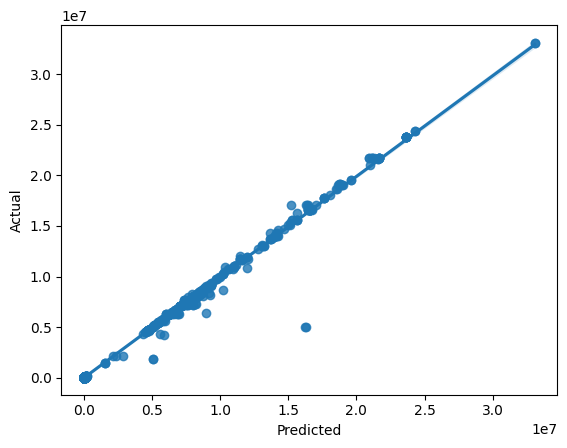

In [29]:
plot = sns.regplot(x=Y_pred,y=Y_test)
plot.set(xlabel="Predicted",ylabel = "Actual")

In [30]:
len(Y_pred)

61500

In [31]:
Y_pred

array([ 377.41664915, 1743.60943699, 2424.56719594, ...,  199.09939087,
        875.99726619,  315.7894737 ])

In [32]:
len(X_test)

61500

In [33]:
a=Y_pred.max()
a

33089005.480000015

In [34]:
s=0
for i in Y_pred:
  if i!=a:
    s+=1
  else:
    break
s

1204

In [35]:
X_test.iloc[1205]

State_Name                   5.0
YEAR                      2021.0
Season                       2.0
Crop                        17.0
Area                         1.0
ANNUAL                    3314.2
Population, total    569999178.0
Name: 139683, dtype: float64

In [40]:
res = final.loc[final['Crop'] == 'Urad']
res

,State_Name,YEAR,Season,Crop,Area,MSP,ANNUAL,"Population, total"
128,Andhra Pradesh,2019,Kharif,Urad,14.0,428.571429,1021.5,545314670
129,Andhra Pradesh,2019,Kharif,Urad,14.0,428.571429,1289.6,545314670
130,Andhra Pradesh,2019,Kharif,Urad,14.0,428.571429,1087.3,545314670
131,Andhra Pradesh,2019,Kharif,Urad,14.0,428.571429,1155.9,545314670
132,Andhra Pradesh,2019,Kharif,Urad,14.0,428.571429,1153.5,545314670
...,...,...,...,...,...,...,...,...
307437,West Bengal,2023,Rabi,Urad,220.0,513.636364,1735.2,596107483
307438,West Bengal,2023,Rabi,Urad,220.0,513.636364,1240.6,596107483
307439,West Bengal,2023,Rabi,Urad,220.0,513.636364,1961.3,596107483
307440,West Bengal,2023,Rabi,Urad,220.0,513.636364,1530.8,596107483


In [37]:
final["Season"].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [41]:
sug=final.loc[
    (final["Season"] == "Rabi       ") & (final["Crop"] != "Urad")]
sug=pd.DataFrame(sug["Crop"].unique())
sug

,0
0,Bajra
1,Gram
2,Groundnut
3,Horse-gram
4,Jowar
5,Maize
6,Moong(Green Gram)
7,Onion
8,Ragi
9,Rice
